# Model CNN TensorFlow - Keras - Emotion Recognition

Content:
- Build the CNN Model with Keras
- Dataset Preparation and Addition of Output Layers
- Callbacks in Keras
- Training the Model
- Visualization of Training Results
- Use the model and add conclusion
- Collaborate with ChatGPT

**Convolutional Neural Network (CNN)** adalah salah satu jenis deep learning model yang paling umum digunakan untuk memproses gambar. CNN mampu memahami fitur kompleks dari gambar melalui proses pelatihan yang optimal. 

Secara visual, dapat kita lihat sebagai berikut:

![Model CNN Architecture](./assets/images/backpropagation-algo.gif)

## Crete CNN model with Keras

Pada praktek ini, kita melatih model CNN untuk mengerjakan tugas pengenalan emosi dari gambar wajah. Kita menggunakan package keras untuk membangun arsitektur CNN dan kita mulai dengan model sequential. CNN ini terdiri dari 3 blok Convolutional Layers (Conv2D + MaxPooling), diikuti oleh Flatten Layer, Dense Layer dan Dropout Layer.

In [10]:
from keras.models import Sequential

model = Sequential()

Model sekuensial adalah jenis model yang membangun layer dalam urutan linear, di mana setiap layer memiliki tepat satu input tensor dan satu output tensor.

In [11]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membuat layer konvolusional:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

Menambahkan layer konvolusional kedalam model. Layer ini memiliki 32 filter dengan ukuran (3, 3) dan menggunakan fungsi aktivasi ReLU (Rectified Linear Unit). Lapisan ini juga menentukan bentuk input yang akan disertakan dalam model, dalam kasus ini bentuknya adalah (48, 48, 1).

Bentuk (48, 48, 1) merujuk kepada dimensi dari input yang akan diolah oleh model. Dalam konteks ini, itu berarti gambar dengan dimensi 48 x 48 piksel dan 1 merujuk kepada jumlah saluran warna atau channels yang diharapkan pada gambar.

Ketika:

1 channel: Gambar tersebut adalah grayscale (hitam dan putih)
3 channels: Gambar tersebut adalah berwarna, umumnya RGB (Red, Green, Blue)
Jadi, dalam kasus ini, model Anda membutuhkan gambar dengan dimensi 48x48 piksel dalam format grayscale sebagai input.

Lapisan konvolusi diikuti oleh layer pooling (Max Pooling) dengan ukuran pool (2,2). Layer MaxPooling digunakan untuk mengurangi dimensi spasial dari output volume.

In [12]:
model.add(Conv2D(64, (3, 3), activation='relu', ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Menambahkan dua layer konvolusional tambahan dan setiap layer diikuti oleh layer MaxPooling. Filter meningkat dua kali lipat setiap kali (64 dan 128), hal ini umum dalam arsitektur CNN karena ini memungkinkan model untuk belajar fitur yang lebih kompleks.

In [13]:
model.add(Flatten())

Layer Flatten digunakan untuk mengubah input menjadi vektor 1D (mengubah semua data menjadi satu dimensi linear panjang). Ini biasanya digunakan sebelum membentuk layer Dense.

In [14]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

Menambahkan layer dense dengan 256 neuron dan fungsi aktivasi ReLU. Layer Dense ini secara penuh (fully) terhubung, artinya semua neuron di layer sebelumnya terhubung dengan semua neuron di layer ini.

Layer Dropout juga ditambahkan setelah layer Dense tersebut, yang secara acak menyetel sebagian input ke 0 saat waktu training, yang membantu untuk mencegah overfitting. Dalam hal ini, 50% (0.5) dari input akan di-dropout.

In [2]:
import os

dataset_path = 'dataset/kaggle'
sub_dirs = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]
num_class = len(sub_dirs)
print(f"Number of classes: {num_class}")

Number of classes: 8


Membaca direktori dataset dan menghitung jumlah sub-direktori (kelas) dalam dataset tersebut

In [15]:
model.add(Dense(num_class, activation='softmax')) # jumlah kelas emosi yang akan di prediksi

Menambahkan lapisan Dense ke model, jumlah neuron sama dengan jumlah kelas dalam dataset (num_class). Fungsi aktivasi yang digunakan adalah softmax, yang umum digunakan untuk lapisan output dalam masalah klasifikasi multi-kelas. Output dari softmax akan memberikan probabilitas untuk setiap kelas dan jumlah dari semua probabilitas akan menjadi 1.

In [16]:
# Mengkompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Mengkompilasi model dengan loss function, optimizer, dan metrik.

- `categorical_crossentropy` adalah loss function yang umum digunakan untuk masalah klasifikasi multi-kelas.
- `adam` adalah jenis optimizer. Adam adalah algoritma optimasi yang dapat digunakan sebagai pengganti prosedur stochastic gradient descent klasik untuk memperbarui bobot jaringan secara iteratif berdasarkan data training.
- `accuracy` adalah metrik yang akan digunakan untuk mengevaluasi performa model.

Jadi, pembuatan model CNN sudah selesai, di mana layer output ditambahkan dan model dikompilasi.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

Model ini adalah model jaringan saraf konvolusional (Convolutional Neural Network, CNN) yang terdiri dari beberapa layer. Berikut penjelasan detail tentang layer-layer tersebut:

1. **conv2d (Conv2D)**: Layer konvolusi pertama dengan 32 filter ukuran 3x3. Output dari layer ini adalah tensor berukuran (None, 46, 46, 32).
2. **max_pooling2d (MaxPooling2D)**: Layer pooling pertama dengan ukuran pool 2x2. Output dari layer ini adalah tensor berukuran (None, 23, 23, 32).
3. **conv2d_1 (Conv2D)**: Layer konvolusi kedua dengan 64 filter ukuran 3x3. Output dari layer ini adalah tensor berukuran (None, 21, 21, 64).
4. **max_pooling2d_1 (MaxPooling2D)**: Layer pooling kedua dengan ukuran pool 2x2. Output dari layer ini adalah tensor berukuran (None, 10, 10, 64).
5. **conv2d_2 (Conv2D)**: Layer konvolusi ketiga dengan 128 filter ukuran 3x3. Output dari layer ini adalah tensor berukuran (None, 8, 8, 128).
6. **max_pooling2d_2 (MaxPooling2D)**: Layer pooling ketiga dengan ukuran pool 2x2. Output dari layer ini adalah tensor berukuran (None, 4, 4, 128).
7. **flatten (Flatten)**: Layer ini mengubah tensor input menjadi vektor 1D. Output dari layer ini adalah tensor berukuran (None, 2048).
8. **dense (Dense)**: Layer ini adalah fully connected layer dengan 256 neuron dan fungsi aktivasi "relu". Output dari layer ini adalah tensor berukuran (None, 256).
9. **dropout (Dropout)**: Layer ini menjatuhkan 50% neuron secara acak untuk mencegah overfitting
10. **dense_1 (Dense)**: Layer output atau fully connected layer terakhir dengan jumlah neuron sama dengan jumlah kelas. Fungsi aktivasi "softmax" digunakan pada layer ini untuk menghasilkan probabilitas kelas.

![CNN Architecture](https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

## Loading Dataset

Kode ini digunakan untuk memuat dataset dari direktori yang ditentukan. Kami telah membagi dataset menjadi training dan test set.

- [Natural Human Face Images for Emotion Recognition - Kaggle](https://www.kaggle.com/datasets/sudarshanvaidya/random-images-for-face-emotion-recognition)

### Data Augmentation

Data augmentation adalah teknik yang digunakan untuk meningkatkan jumlah data dengan menambahkan versi modifikasi dari gambar ke dalam pool. Teknik ini memungkinkan model mempelajari data melalui berbagai titik pandang dan mengurangi overfitting.

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Membuat generator gambar dengan augmentasi data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # test data tetap hanya di rescale

training_set = train_datagen.flow_from_directory(dataset_path, 
                                                 target_size=(48, 48), 
                                                 batch_size=32, 
                                                 color_mode='grayscale', 
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(dataset_path, 
                                            target_size=(48, 48), 
                                            batch_size=32, 
                                            color_mode='grayscale', 
                                            class_mode='categorical')

print(training_set.class_indices)

Found 5558 images belonging to 8 classes.
Found 5558 images belonging to 8 classes.
{'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happiness': 4, 'neutrality': 5, 'sadness': 6, 'surprise': 7}


## Callbacks

Callbacks adalah objek khusus yang bisa Anda sisipkan ke dalam proses training untuk menyesuaikan proses tersebut atau melakukan tindakan tertentu setiap kali kondisi tertentu terpenuhi.

In [68]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystop = EarlyStopping(patience=5)

Callback `EarlyStopping` digunakan untuk menghentikan training ketika sebuah metrik tertentu berhenti meningkat. Dalam hal ini, model akan berhenti training jika tidak ada peningkatan dalam metrik yang diperiksa (defaultnya adalah loss validation) setelah 5 epoch (dengan asumsi `patience=5`).

In [69]:
checkpoint = ModelCheckpoint('model/keras/best_model.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto')

Callback `ModelCheckpoint`` digunakan untuk menyimpan model setelah setiap epoch.

- `model/cnn/best_model.h5` adalah file tempat model dengan performa terbaik akan disimpan.
- `monitor='val_loss'` berarti callback ini akan memantau loss validation dari model.
- `verbose=1` berarti callback ini akan mencetak pesan saat model disimpan.
- `save_best_only=True` berarti hanya model dengan loss validation terkecil yang akan disimpan. Jika False, maka model setelah setiap epoch akan disimpan.
- `mode='auto'` berarti arah peningkatan atau penurunan metrik yang dipantau (dalam hal ini val_loss) akan otomatis dideteksi dan digunakan untuk memutuskan kapan harus menyimpan model.

In [70]:
callbacks_list = [reduce_lr, earlystop, checkpoint]

Membuat list yang berisi kedua callback ini. Anda nantinya akan memberikan list ini sebagai argumen untuk parameter callbacks ketika memanggil method fit() untuk melatih model Anda. Callbacks dalam list ini akan dipanggil dalam urutan yang sama seperti yang ditentukan dalam list.

## Training the Model

Akhirnya, kita melatih model dengan dataset yang disiapkan menggunakan callback seperti `EarlyStopping` dan `ModelCheckpoint` untuk menghentikan pelatihan jika model tidak lagi memperbaiki hasil setelah beberapa epoch dan untuk menyimpan model dengan hasil terbaik.

In [ ]:
history = model.fit(training_set, 
          validation_data=test_set, 
          epochs=100,
          callbacks=callbacks_list)

**Tips:** ada beberapa hal yang bisa dilakukan untuk meningkatkan kinerja model:

- **Tambahkan lebih banyak data**: Jika Anda memiliki lebih banyak data, model dapat belajar pola yang lebih bervariasi, yang dapat meningkatkan akurasi.
- **Data augmentation**: Jika Anda tidak memiliki cukup data, Anda bisa mencoba teknik augmentasi data seperti flipping, rotating, zooming, dll.
- **Tambahkan lebih banyak layer atau ubah parameter**: Anda bisa mencoba menambahkan lebih banyak layer konvolusi atau dense, atau mengubah jumlah neuron dalam layer tersebut. Anda juga bisa menambahkan atau mengubah dropout rate.
- **Epoch**: Anda bisa mencoba meningkatkan jumlah epoch. Dengan melakukan lebih banyak iterasi, model mungkin dapat belajar lebih baik. Namun perhatikan untuk jangan sampai overfitting.

## Visualize change in loss and model accuracy

Memvisualisasikan perubahan loss (kerugian) dan akurasi model selama proses training dan validasi dengan menggunakan `Matplotlib`, library visualisasi data di Python. `history` adalah objek yang dikembalikan oleh method `fit()` saat melatih model dan berisi catatan loss dan metrik lainnya setiap kali epoch.

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(["Train", "Loss"], loc="upper left")
plt.title('Loss')

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(["Train", "Loss"], loc="upper left")
plt.title('Accuracy')

plt.tight_layout()
plt.show()

Jadi, kode ini pada dasarnya membuat dua plot: satu untuk loss dan satu untuk akurasi. Untuk setiap plot, nilai training dan validasi ditampilkan. Ini adalah cara yang baik untuk memvisualisasikan proses training dan untuk melihat apakah model overfit (jika loss training menurun tetapi loss validasi mulai meningkat) atau underfit (jika loss training dan validasi masih tinggi).

## Use the model

1/1 [==============================] - 0s 137ms/step


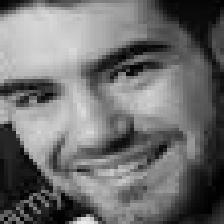

[0.01161743 0.02046127 0.01488164 0.06019428 0.74497455 0.02503063
 0.05852036 0.06431984]
happiness: 74.49745535850525%
surprise: 6.431984156370163%
fear: 6.019427627325058%
sadness: 5.852035805583%
neutrality: 2.5030625984072685%
contempt: 2.0461270585656166%
disgust: 1.4881640672683716%
anger: 1.1617425829172134%


In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from IPython.display import Image, display
import numpy as np

# Load the model
model = load_model('model/master/emotion_model_kaggle.h5')

img_path = 'dataset/kaggle/happiness/2Q__ (11)_face.png'
# Load image
img = load_img(img_path, target_size=(48, 48), color_mode='grayscale')

# Convert image to array and expand dimension
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Standardize (Rescale pixel values)
test_data = img_array / 255.0

# Make prediction
preds = model.predict(test_data)
display(Image(img_path))
print(preds[0])
slov_res ={}
for i in training_set.class_indices:
    slov_res[i] = preds[0][training_set.class_indices[i]]
    

sorted_keys = sorted(slov_res, key=slov_res.get, reverse = True)
sorted_dict = {}
for w in sorted_keys:
    sorted_dict[w] = slov_res[w]
    
for i in sorted_dict:
    print(str(i) + ': ' + str(sorted_dict[i]*100) + '%')

## Add conclusion

In [22]:
top_emotion = list(sorted_dict.keys())[0]
top_emotion_percentage = sorted_dict[top_emotion]*100
second_emotion = list(sorted_dict.keys())[1]
second_emotion_percentage = sorted_dict[second_emotion]*100

print(f"\nKesimpulan:")
print(f"Gambar tersebut sebagian besar menunjukkan emosi {top_emotion} dengan tingkat keyakinan {top_emotion_percentage}%.")
print(f"Selain itu, model juga merasakan emosi {second_emotion} dengan tingkat keyakinan {second_emotion_percentage}%.")


Kesimpulan:
Gambar tersebut sebagian besar menunjukkan emosi happiness dengan tingkat keyakinan 99.95067119598389%.
Selain itu, model juga merasakan emosi surprise dengan tingkat keyakinan 0.0251894467510283%.


## Collaborate with ChatGPT 

In [26]:
import openai
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

# Set your API key
openai.api_key  = os.environ['OPENAI_API_KEY']

# Generate a response
response = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "The person seems to be " + top_emotion}
    ]
)

# Get the response
output = response['choices'][0]['message']['content']
print(output)

It's great to hear that! Being happy is a wonderful feeling. Is there anything specific you would like assistance with related to happiness?
